In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_titanic = pd.read_csv('./data_titanic/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### dataset Description

In [3]:
print(f'Total of Row = {df_titanic.shape[0]}')
print(f'Total of Column = {df_titanic.shape[1]}')

Total of Row = 891
Total of Column = 12


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

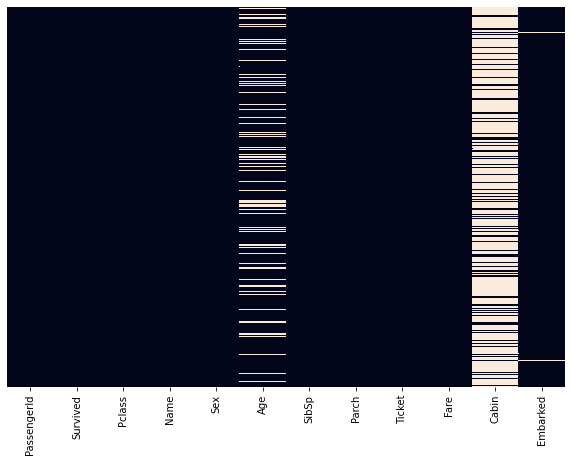

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df_titanic.isna(), yticklabels=False, cbar=False)

In [7]:
titanic_desc = []

for i in df_titanic.columns:
    titanic_desc.append([
        i,
        df_titanic[i].dtypes,
        df_titanic[i].isna().sum(),
        (((df_titanic[i].isna().sum())/len(df_titanic))*100).round(2),
        df_titanic[i].nunique(),
        df_titanic[i].drop_duplicates().sample(2).values
    ])

In [8]:
pd.DataFrame(data = titanic_desc, columns = [
    'Data Feature',
    'Data types',
    'Null',
    'Null pct',
    'Unique',
    'Unique Sample'
])

,Data Feature,Data types,Null,Null pct,Unique,Unique Sample
0,PassengerId,int64,0,0.00,891,"[100, 662]"
1,Survived,int64,0,0.00,2,"[0, 1]"
2,Pclass,int64,0,0.00,3,"[3, 1]"
3,Name,object,0,0.00,891,"[Mitchell, Mr. Henry Michael, Denkoff, Mr. Mitto]"
4,Sex,object,0,0.00,2,"[male, female]"
5,Age,float64,177,19.87,88,"[23.0, 32.5]"
6,SibSp,int64,0,0.00,7,"[5, 8]"
7,Parch,int64,0,0.00,7,"[2, 3]"
8,Ticket,object,0,0.00,681,"[3101265, PC 17483]"
9,Fare,float64,0,0.00,248,"[108.9, 6.4958]"


In [9]:
df_titanic[df_titanic.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
df_titanic[df_titanic['Pclass'] == 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Handling Missing Value

In [11]:
## Age
df_titanic.Age.isnull().sum()

177

fill in the missing values in the age column, using the median

In [12]:
df_titanic['Age'].fillna(df_titanic['Age'].median() , inplace = True)

In [13]:
df_titanic.Age.isnull().sum()

0

In [14]:
## Cabin
df_titanic.drop('Cabin', axis=1, inplace=True)

because of the percentage of missing value in Cabin column is above 70%, the cabin column is drop

In [15]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
#Embarked
df_titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
df_titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df_titanic['Embarked'].isna().sum()

2

In [19]:
df_titanic['Embarked'] = df_titanic['Embarked'].fillna('C')

In [20]:
df_titanic['Embarked'].isna().sum()

0

In [21]:
df_titanic.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
df_titanic['Embarked'].isna().sum()

0

In [23]:
df_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Analysis

In [24]:
df_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [25]:
df_titanic.describe(include='O').T

,count,unique,top,freq
Name,891,891,"Richards, Master. George Sibley",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Embarked,891,3,S,644


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

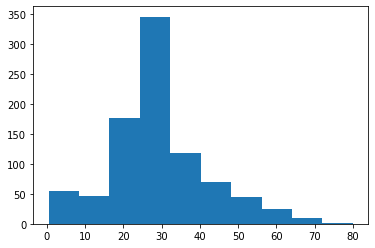

In [26]:
plt.hist(df_titanic.Age)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


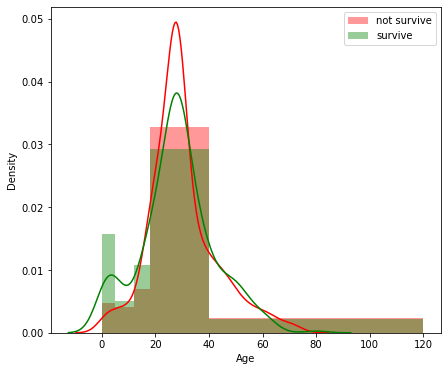

In [27]:
plt.figure(figsize=(7, 6))
sns.distplot(df_titanic.Age[df_titanic.Survived==0], bins=[0, 5, 12, 18, 40, 120], color='r', label='not survive')
sns.distplot(df_titanic.Age[df_titanic.Survived==1], bins=[0, 5, 12, 18, 40, 120], color='g', label='survive')
plt.legend();

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Survived
0,549
1,342


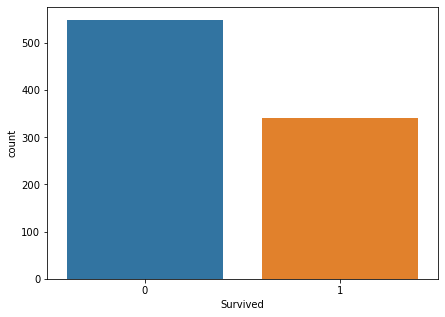

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(df_titanic.Survived)

pd.DataFrame(df_titanic.Survived.value_counts())

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Sex
male,577
female,314


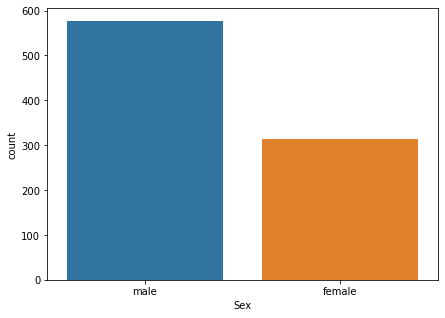

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(df_titanic.Sex)

pd.DataFrame(df_titanic.Sex.value_counts())

<AxesSubplot:xlabel='Survived', ylabel='count'>

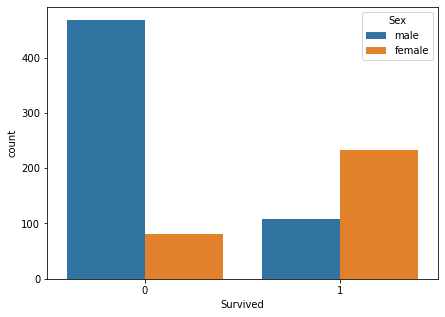

In [30]:
plt.figure(figsize=(7,5))
sns.countplot(x='Survived', hue='Sex', data=df_titanic)

- the largest number of victims who didn't survive were male
- the survivors were mostly female

Pclass,1,2,3,Total
Survived,,,,
0,80,97,372,549
1,136,87,119,342
Total,216,184,491,891


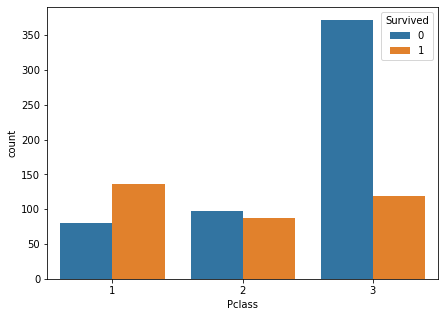

In [31]:
plt.figure(figsize=(7,5))
sns.countplot(hue='Survived', x='Pclass', data=df_titanic)

pd.crosstab(index=df_titanic['Survived'], columns=df_titanic['Pclass'], margins=True, margins_name='Total')

Passenger tickets have 3 classes, from class 1 to 3
- Passenger from third class were not survived the most, first class were least not survived
- First class passengers were the ones who survived the most, second class were least survived

<AxesSubplot:xlabel='Embarked', ylabel='count'>

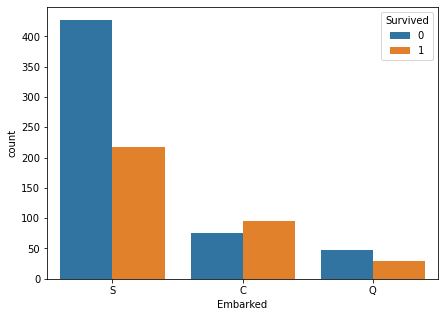

In [32]:
plt.figure(figsize=(7,5))
sns.countplot(hue='Survived', x='Embarked', data=df_titanic)

In [33]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

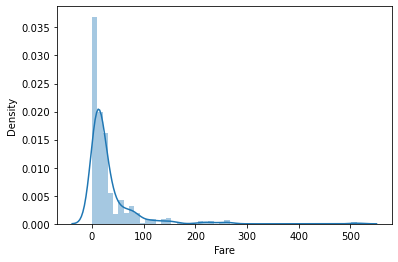

In [34]:
sns.distplot(df_titanic['Fare'])

In [35]:
df_titanic.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [36]:
pd.DataFrame(df_titanic.loc[df_titanic['Fare'].idxmax()]).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.329,C


In [37]:
df_titanic[df_titanic['Fare']==df_titanic['Fare'].max()].value_counts().sum()

3

In [38]:
df_titanic[df_titanic['Fare']==df_titanic['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [39]:
pd.DataFrame(df_titanic.loc[df_titanic['Fare'].idxmin()]).T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0,S


In [40]:
df_titanic[df_titanic['Fare'] == 0].value_counts().sum()

15

In [41]:
df_titanic[df_titanic['Fare']==df_titanic['Fare'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0,S


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

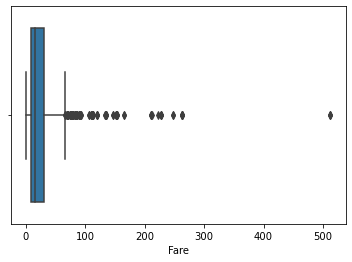

In [42]:
sns.boxplot(df_titanic['Fare'])

In [43]:
df_titanic[df_titanic['SibSp'] & df_titanic['Parch'] > 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.900,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.000,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.750,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.900,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.900,S


In [44]:
df_titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [45]:
pd.crosstab(index=df_titanic['Survived'], columns=df_titanic['SibSp'], margins=True, margins_name='Total')

SibSp,0,1,2,3,4,5,8,Total
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
Total,608,209,28,16,18,5,7,891


Several insight according to the table :
- passenger carrying  5 - 8 sibling didn't survived
- The highest percentage of survivors was those who carried 2 siblings

In [46]:
pd.crosstab(index=df_titanic['Survived'], columns=df_titanic['Parch'], margins=True, margins_name='Total')

Parch,0,1,2,3,4,5,6,Total
Survived,,,,,,,,
0,445,53,40,2,4,4,1,549
1,233,65,40,3,0,1,0,342
Total,678,118,80,5,4,5,1,891


In [47]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [48]:
# df_titanic.to_csv('titanic_clean.csv')